In [416]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import os
import cv2
import time


In [417]:
path = r'C:\Users\lmmwe\OneDrive\Desktop\Digital Image Processing Project\train'

In [418]:
n,m = 256,128

In [419]:
data = []
for img in os.listdir(path):
    img = cv2.imread(os.path.join(path,img))
    if img is not None:
       gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) #gray image
       resize_img = cv2.resize(gray_img, (n,m)) #resize image, 256*128
       data.append(resize_img)

In [420]:
sym = {0:'5',1:'10', 2:'20', 3:'50', 4:'100'}

In [421]:
x = np.array(data)
x = x.reshape(x.shape[0],n*m)
x = x/255.0
y = np.array([[i]*210 for i in range(10)]).flatten()
x.shape, len(y)

((2100, 32768), 2100)

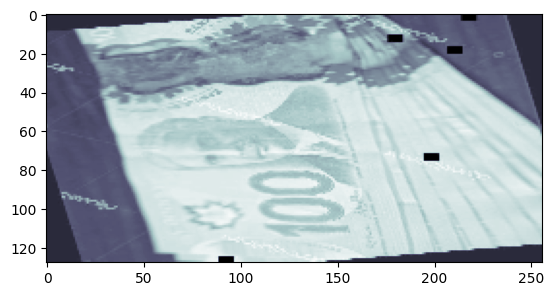

In [422]:
plt.imshow(x[10].reshape(m,n), cmap=plt.cm.bone)

In [423]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size = 0.2, random_state = 0)
x_train.shape, x_val.shape, y_train.shape, y_val.shape

((1680, 32768), (420, 32768), (1680,), (420,))

In [424]:
from tensorflow.keras.utils import to_categorical
from keras import models
from keras import layers
import tensorflow
tensorflow.random.set_seed(0)
from numpy.random import seed
seed(0)

In [425]:
y_train = to_categorical(y_train)
y_train.shape, x_train.shape

((1680, 10), (1680, 32768))

In [426]:
NN = models.Sequential()
NN.add(layers.Dense(1024, activation = 'tanh', input_shape = (x_train.shape[1],)))
NN.add(layers.Dense(512, activation = 'relu'))
NN.add(layers.Dense(256, activation = 'relu'))
NN.add(layers.Dense(10, activation = 'Softmax'))

In [427]:
NN.summary() 

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_64 (Dense)            (None, 1024)              33555456  
                                                                 
 dense_65 (Dense)            (None, 512)               524800    
                                                                 
 dense_66 (Dense)            (None, 256)               131328    
                                                                 


 dense_67 (Dense)            (None, 10)                2570      
                                                                 
Total params: 34214154 (130.52 MB)
Trainable params: 34214154 (130.52 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [428]:
NN.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [429]:
start = time.time()
NN.fit(x_train, y_train, epochs = 150, batch_size=32)
nn_time = time.time() - start

Epoch 1/150
53/53 [==============================] - 32s 543ms/step - loss: 2.8351 - accuracy: 0.1065
Epoch 2/150
53/53 [==============================] - 27s 513ms/step - loss: 2.3228 - accuracy: 0.1036
Epoch 3/150
53/53 [==============================] - 26s 498ms/step - loss: 2.3051 - accuracy: 0.0964
Epoch 4/150
53/53 [==============================] - 27s 504ms/step - loss: 2.3058 - accuracy: 0.1018
Epoch 5/150
53/53 [==============================] - 27s 504ms/step - loss: 2.3035 - accuracy: 0.0970
Epoch 6/150
53/53 [==============================] - 27s 511ms/step - loss: 2.3029 - accuracy: 0.1065
Epoch 7/150
53/53 [==============================] - 27s 508ms/step - loss: 2.3028 - accuracy: 0.1065
Epoch 8/150
53/53 [==============================] - 27s 505ms/step - loss: 2.3027 - accuracy: 0.1065
Epoch 9/150
53/53 [==============================] - 27s 510ms/step - loss: 2.3027 - accuracy: 0.1054
Epoch 10/150
53/53 [==============================] - 27s 507ms/step - loss: 2.302

In [430]:
pred_nn = NN.predict(x_val)

14/14 [==============================] - 1s 54ms/step


In [431]:
predict_nn = [np.argmax(pred_nn[i], axis = -1) for i in range(x_val.shape[0])]

In [433]:
actual = []
for i in y_val:
    if i < len(sym):
        actual.append(f' {sym[i]} CAD')
    else:
        actual.append('Unknown Symbol')

pred = []
for i in predict_nn:
    if i < len(sym):
        pred.append(f' {sym[i]} CAD')
    else:
        pred.append('Unknown Symbol')

In [434]:
pd.DataFrame(zip(actual, pred), columns= ['Actual', 'Predicted'])

,Actual,Predicted
0,Unknown Symbol,Unknown Symbol
1,Unknown Symbol,Unknown Symbol
2,Unknown Symbol,Unknown Symbol
3,Unknown Symbol,Unknown Symbol
4,50 CAD,Unknown Symbol
...,...,...
415,Unknown Symbol,Unknown Symbol
416,5 CAD,Unknown Symbol
417,5 CAD,Unknown Symbol
418,Unknown Symbol,Unknown Symbol


In [435]:
from sklearn.metrics import confusion_matrix,classification_report

In [436]:
confusion_matrix(predict_nn, y_val)

array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [38, 45, 51, 39, 41, 41, 31, 47, 40, 47],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0]], dtype=int64)

In [437]:
print(classification_report(y_val, predict_nn))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        38
           1       0.00      0.00      0.00        45
           2       0.00      0.00      0.00        51
           3       0.00      0.00      0.00        39
           4       0.00      0.00      0.00        41
           5       0.00      0.00      0.00        41
           6       0.07      1.00      0.14        31
           7       0.00      0.00      0.00        47
           8       0.00      0.00      0.00        40
           9       0.00      0.00      0.00        47

    accuracy                           0.07       420
   macro avg       0.01      0.10      0.01       420
weighted avg       0.01      0.07      0.01       420



c:\Users\lmmwe\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\lmmwe\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\lmmwe\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [438]:
from tensorflow.keras.utils import to_categorical

In [439]:
y_val_one_hot = to_categorical(y_val, num_classes=10)

In [440]:
val_loss, val_acc = NN.evaluate(x_val, y_val_one_hot)
print(f'ACCURACY : {val_acc}, \nLOSS : {val_loss}')

14/14 [==============================] - 1s 64ms/step - loss: 2.3072 - accuracy: 0.0738
ACCURACY : 0.07380952686071396, 
LOSS : 2.3071820735931396


In [441]:
from sklearn.decomposition import PCA

In [442]:
def evaluate( components, eigenValues, eigenVectors, df):
    weightage = {}
    col = ['PC' + str(1+1) for i in range(components.shape[1])]
    transform = pd.DataFrame(components, columns= col)

    var = eigenValues/sum(eigenValues)
    for i in range(1, len(var)+1):
        if sum(var[:i])>=0.9:
            no_of_pc = i
            break
    print(f'\n{no_of_pc} components explains 90% or more variability')

    for i in range(no_of_pc):
        top_n = np.argsort( abs( eigenVectors[i]) )[::-1][:4]
        weightage['PC' +str(i+1)] = [str(round(abs(eigenVectors[i][j]),4)) for j in top_n]

    impact = pd.DataFrame.from_dict(weightage, orient='index')
    impact[ 'Eigen Values'] = eigenValues[:no_of_pc]
    impact['Variability (%)'] = var[:no_of_pc]
    impact['Cummulative Variability (%)'] = [sum(var[:i]) for i in range(1, no_of_pc+1)]
    return transform, impact, no_of_pc

In [443]:
def PCA_lib(df):
    pca = PCA()
    pca.fit(df)
    eigenVectors = pca.components_.T
    eigenValues = pca.explained_variance_
    components = pca.transform(df)
    return pca, components, eigenValues, eigenVectors

In [444]:
pca, components, eigenValues, eigenVectors = PCA_lib(x)

In [445]:
x_pca, impact, no_of_pc = evaluate(components, eigenValues, eigenVectors, x)


352 components explains 90% or more variability


In [446]:
x.shape, x_pca.shape, y.shape


((2100, 32768), (2100, 2100), (2100,))

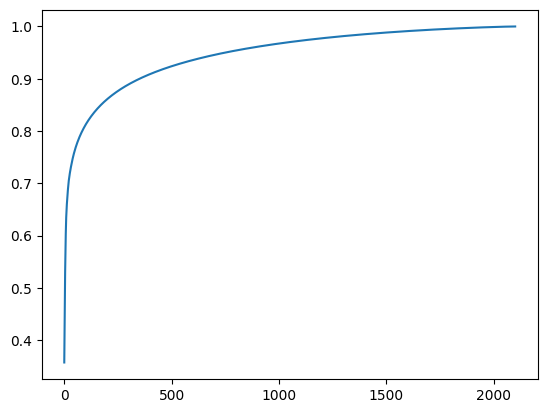

In [447]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))

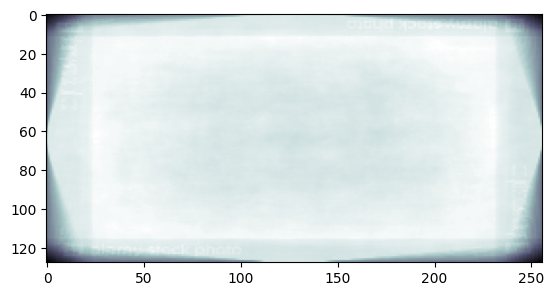

In [448]:
plt.imshow(pca.mean_.reshape(m,n),cmap=plt.cm.bone)

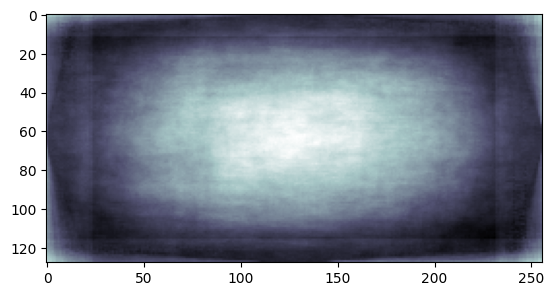

In [449]:
plt.imshow(eigenVectors.T[0].reshape(m,n),cmap=plt.cm.bone)

In [450]:
projected_train = pca.fit_transform(x)
projected_train.shape

(2100, 2100)

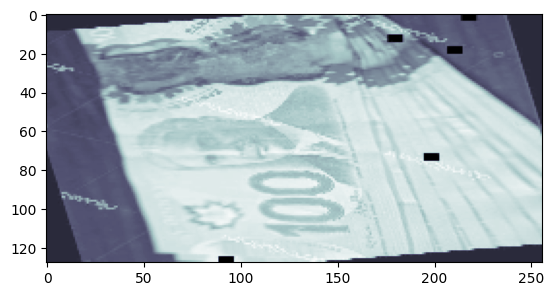

In [451]:
inv_proj = pca.inverse_transform(projected_train)
plt.imshow(inv_proj[10].reshape(m,n),cmap=plt.cm.bone)

In [452]:
x_pca_train, x_pca_val, y_train, y_val = train_test_split(x_pca, y, test_size=0.2, random_state=0)
x_pca_train.shape, x_pca_val.shape, y_train.shape, y_val.shape

((1680, 2100), (420, 2100), (1680,), (420,))

In [453]:
y_train = to_categorical(y_train)
y_train.shape, x_pca_train.shape

((1680, 10), (1680, 2100))

In [454]:
NN_pca = models.Sequential()
NN_pca.add(layers.Dense(1024, activation = 'tanh', input_shape = (x_pca_train.shape[1],)))
NN_pca.add(layers.Dense(512, activation = 'relu'))
NN_pca.add(layers.Dense(256, activation = 'relu'))
NN_pca.add(layers.Dense(10, activation = 'Softmax'))

In [455]:

NN_pca.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_68 (Dense)            (None, 1024)              2151424   
                                                                 
 dense_69 (Dense)            (None, 512)               524800    
                                                                 
 dense_70 (Dense)            (None, 256)               131328    
                                                                 
 dense_71 (Dense)            (None, 10)                2570      
                                                                 
Total params: 2810122 (10.72 MB)
Trainable params: 2810122 (10.72 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [456]:
NN_pca.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [457]:
start = time.time()
NN_pca.fit(x_pca_train, y_train, epochs = 150, batch_size=15)
nn_pca_time = time.time()-start

Epoch 1/150
112/112 [==============================] - 6s 40ms/step - loss: 2.3652 - accuracy: 0.1821
Epoch 2/150
112/112 [==============================] - 4s 39ms/step - loss: 1.1325 - accuracy: 0.6369
Epoch 3/150
112/112 [==============================] - 4s 34ms/step - loss: 0.2149 - accuracy: 0.9339
Epoch 4/150
112/112 [==============================] - 4s 35ms/step - loss: 0.1057 - accuracy: 0.9720
Epoch 5/150
112/112 [==============================] - 4s 35ms/step - loss: 0.1046 - accuracy: 0.9690
Epoch 6/150
112/112 [==============================] - 4s 36ms/step - loss: 0.0818 - accuracy: 0.9821
Epoch 7/150
112/112 [==============================] - 4s 34ms/step - loss: 0.0827 - accuracy: 0.9821
Epoch 8/150
112/112 [==============================] - 4s 35ms/step - loss: 0.0709 - accuracy: 0.9810
Epoch 9/150
112/112 [==============================] - 4s 35ms/step - loss: 0.0462 - accuracy: 0.9863
Epoch 10/150
112/112 [==============================] - 4s 37ms/step - loss: 0.057

In [458]:
pred_nn_pca = NN_pca.predict(x_pca_val)

14/14 [==============================] - 0s 7ms/step


In [459]:
predict_nn_pca = [np.argmax(pred_nn_pca[i], axis = -1) for i in range(x_pca_val.shape[0])]

In [461]:
actual_pca = []
for i in y_val:
    if i < len(sym):
        actual_pca.append(f'{sym[i]} CAD')
    else:
        actual_pca.append('Unknown Symbol')
    
pred_pca = []
for i in predict_nn_pca:
    if i < len(sym):
        pred_pca.append(f'{sym[i]} CAD')
    else:
        pred_pca.append('Unknown Symbol')

In [462]:
pd.DataFrame(zip(actual_pca, pred_pca), columns = ['Actual', 'Predicted'])

,Actual,Predicted
0,Unknown Symbol,Unknown Symbol
1,Unknown Symbol,Unknown Symbol
2,Unknown Symbol,5 CAD
3,Unknown Symbol,Unknown Symbol
4,50 CAD,Unknown Symbol
...,...,...
415,Unknown Symbol,50 CAD
416,5 CAD,10 CAD
417,5 CAD,100 CAD
418,Unknown Symbol,Unknown Symbol


In [463]:
confusion_matrix(predict_nn_pca, y_val)

array([[ 6,  9,  4,  4,  3,  3,  3,  7,  2,  4],
       [ 6,  9,  4,  5,  5,  0,  6,  2,  5,  4],
       [ 1,  5, 13,  2,  4,  3,  1,  8,  2,  6],
       [ 2,  3,  8,  8,  8,  4,  3,  2,  4,  1],
       [ 3,  6,  3,  5,  5,  1,  2,  3,  4,  5],
       [ 5,  2,  6,  2,  0,  5,  1,  3,  0,  2],
       [ 4,  3,  1,  6,  3, 10,  5,  5,  4,  0],
       [ 6,  1,  6,  3,  6,  6,  7,  7,  6,  7],
       [ 3,  3,  2,  4,  2,  6,  1,  4,  9, 11],
       [ 2,  4,  4,  0,  5,  3,  2,  6,  4,  7]], dtype=int64)

In [464]:
print(classification_report(y_val, predict_nn_pca))

              precision    recall  f1-score   support

           0       0.13      0.16      0.14        38
           1       0.20      0.20      0.20        45
           2       0.29      0.25      0.27        51
           3       0.19      0.21      0.20        39
           4       0.14      0.12      0.13        41
           5       0.19      0.12      0.15        41
           6       0.12      0.16      0.14        31
           7       0.13      0.15      0.14        47
           8       0.20      0.23      0.21        40
           9       0.19      0.15      0.17        47

    accuracy                           0.18       420
   macro avg       0.18      0.17      0.17       420
weighted avg       0.18      0.18      0.18       420



In [466]:
from tensorflow.keras.utils import to_categorical

In [467]:
y_val_one_hot = to_categorical(y_val, num_classes=10)
y_val_one_hot = y_val_one_hot.reshape(-1, 10)

In [468]:
val_loss_pca, val_acc_pca = NN_pca.evaluate(x_pca_val, y_val_one_hot)
print(f'ACCURACY : {val_acc_pca}, \nLOSS : {val_loss_pca}')

14/14 [==============================] - 0s 5ms/step - loss: 27.4216 - accuracy: 0.1762
ACCURACY : 0.17619048058986664, 
LOSS : 27.421600341796875


In [469]:
nn_time = str(round(nn_time,2)) + ' sec'
nn_pca_time = str(round(nn_pca_time,2)) + ' sec'

In [470]:
pd.DataFrame([[val_acc, val_loss, nn_time],[val_acc_pca, val_loss_pca, nn_pca_time]], columns = ['Accuracy', 'Loss', 'Time Taken'], index = ['Without PCA', 'With PCA'])

,Accuracy,Loss,Time Taken
Without PCA,0.07381,2.307182,26656.58 sec
With PCA,0.17619,27.421600,674.4 sec


In [471]:
path = r'C:\Users\lmmwe\OneDrive\Desktop\Digital Image Processing Project\test'

In [472]:
test_data = []
for img in os.listdir(path):
    img = cv2.imread(os.path.join(path,img))
    if img is not None:
        gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        resize_img = cv2.resize(gray_img, (n,m))
        test_data.append(resize_img)

In [473]:
x_test = np.array(test_data)
x_test = x_test.reshape(x_test.shape[0],n*m)
x_test = x_test/255.0
y_test = [1,0,3,2,5,4,7,6,8,9]
x_test.shape, len(y_test)

((100, 32768), 10)

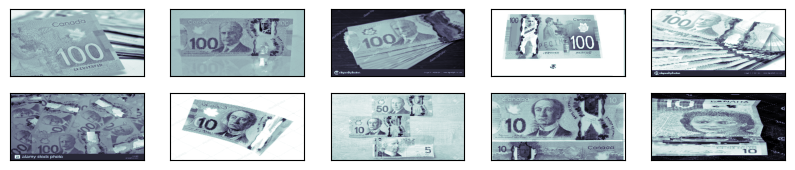

In [475]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,2))

for i in range(min(10, x_test.shape[0])):
    ax = fig.add_subplot(2,5, i + 1, xticks=[], yticks=[])
    ax.imshow(x_test[i].reshape(m,n), cmap=plt.cm.bone)

In [476]:
x_test_pca = pca.transform(x_test)
x_test_pca.shape

(100, 2100)

In [477]:
pred_test = NN_pca.predict(x_test_pca)

4/4 [==============================] - 0s 6ms/step


In [478]:
predict_test = [np.argmax(pred_test[i], axis = -1) for i in range(x_test_pca.shape[0])]

In [481]:
actual_test = []
for i in y_test:
    if i < len(sym):
        actual_test.append(f'{sym[i]} CAD')
    else:
        actual_test.append('Unknown Symbol')
pred_test = []
for i in predict_test:
    if i < len(sym):
        pred_test.append(f'{sym[i]} CAD')
    else:
        pred_test.append('Unknown Symbol')

In [482]:
pd.DataFrame(zip(actual_test, pred_test), columns = ['Actual', 'Predicted'])

,Actual,Predicted
0,10 CAD,5 CAD
1,5 CAD,50 CAD
2,50 CAD,5 CAD
3,20 CAD,10 CAD
4,Unknown Symbol,Unknown Symbol
5,100 CAD,5 CAD
6,Unknown Symbol,5 CAD
7,Unknown Symbol,Unknown Symbol
8,Unknown Symbol,20 CAD
9,Unknown Symbol,100 CAD


In [490]:
from tensorflow.keras.utils import to_categorical
from keras.utils import to_categorical

In [495]:
unique_labels = np.unique(y_test)
max_label = np.max(unique_labels)

num_classes = max_label + 1
y_test_encoded = to_categorical(y_test, num_classes=num_classes)

In [496]:
test_loss, test_acc = NN_pca.evaluate(x_test_pca, y_test_encoded)
print(f'ACCURACY : {test_acc}, \nLOSS : {test_loss}')

14/14 [==============================] - 1s 14ms/step - loss: 6.0697 - accuracy: 0.8238
ACCURACY : 0.8238095045089722, 
LOSS : 6.069730281829834
